# Universidad de Buenos Aires
# Deep Learning - TP1
# Noviembre 2023



El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el Domingo 24 de diciembre. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com). Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$
<br>
<br>
1. Aplicar gradiente de forma analítica e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

2. Aplicar SGD para encontrar la ubicación del máximo de manera numérica (pueden utilizar pytorch). Comparar con el resultado obtenido en el punto 1

## Ejercicio 2


Descargar el dataset del siguiente link: https://drive.google.com/file/d/1eFWn7eDmSFUK1JuuBBykxkC9J0CGYDKe/view?usp=sharing.

El dataset contiene mediciones obtenidas al ensayar un sistema de posicionamiento. El sistema consiste en un dispositivo móvil del cual se desea conocer la posición y 13 "balizas" fijas (distribuidas en un salón) que emiten señales de radio.

Cada fila del dataset contiene una posición del dispositivo móvil y los niveles de señal recibida (de las señales emitidas por cada una de las 13 balizas fijas) en dicha posición.

![Salon](https://drive.google.com/uc?export=view&id=1z3uHEd3tS1kQpGXfhPYn2GFfA95v_ArW)


Algunas consideraciones:
- La imágen anterior es orientativa, no se encuentra a escala ni representa la verdadera posición de las balizas fijas.
- La posición en el salón se divide en una cuadrícula. La posición horizontal se codifica con una letra de la A a la Z y la posición vertical se codifica con valores de 01 a 20.
- El nivel de señal recibida se mide de 0 (máximo teórico) a -200 (mínimo teórico). NA significa que no se recibe señal de la baliza en dicha posición. A efectos prácticos no recibir señal (NA) es equivalente a recibir una señal con nivel -200.

**Consignas:**

1. Analizar el dataset y aplicar las transformaciones que considere necesarias para entrenar un modelo de red neuronal.

2. Entrenar un modelo de **Deep Learning** con múltiples capas lineales que prediga la posición del dispositivo móvil en el salón (vertical y horizontal) a partir de las mediciones de los niveles de las 13 balizas. Graficar la evolución de la función de pérdida y la evolución de la métrica [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) durante el entrenamiento.

3. Comprobar el funcionamiento del modelo realizando una predicción sobre una muestra aleatoria del dataset y comparar con la posición real.

Con la finalidad de ahorrar energía en el dispositivo móvil y simplificar el sistema, se quiere ensayar la posibilidad de predecir la posición solamente con la información del nivel de señal de las 2 balizas mas cercanas.

4. Aplicar las transformaciones necesarias sobre el dataset para obtener un nuevo dataset que contenga solamente la información de las 2 balizas con mayor nivel de señal (ver imágen adjunta). Si no se recibe señal de una 2da baliza, proponer un método para completar la información faltante.

![Dataset Punto 4](https://drive.google.com/uc?export=view&id=1kz1Y5m5rmbYPiuZIc4QHvnt4uFB2TwWu)


5. Entrenar un modelo de **Deep Learning** que prediga la posición del dispositivo móvil en el salón (vertical y horizontal) a partir del dataset del punto 4, incluyendo **una capa de embeddings** para ambos número (o IDs) de balizas.

6. Comparar los resultados obtenidos con los modelo de los puntos 2 y 5 y enunciar conclusiones.

# Resolucion
## Importacion de librerías públicas

In [47]:
# Importar librerías
import torch
import matplotlib.pyplot as plt
import pandas as pd

## Definición de funciones

In [48]:
def process_single_coordinate(coor: str):
    ZERO_LETTER = ord("A")
    x = ord(coor[0]) - ZERO_LETTER
    y = int(coor[1:3])
    return x, y


def process_coordinates(col: pd.Series):
    x, y = process_single_coordinate(col)
    return pd.Series({"x": x, "y": y})

## Ejercicio 1
#### Apartado 1
La resolución analítica es la siguiente:

z = -(x-2)^2 -(y-3)^2 + 4 

z = -x^2 + 4x - 4 - y^2 + 6y - 9 + 4

z = -x^2 + 4x - y^2 + 6y -9


Realizamos el cáculo del gradiente derivando la función en `x` y en `y`:

dz/dx = -2x + 4

dz/dy = -2y + 6


El punto donde el gradiente es 0 es en el punto (x,y) = (2,3)

#### Apartado 2

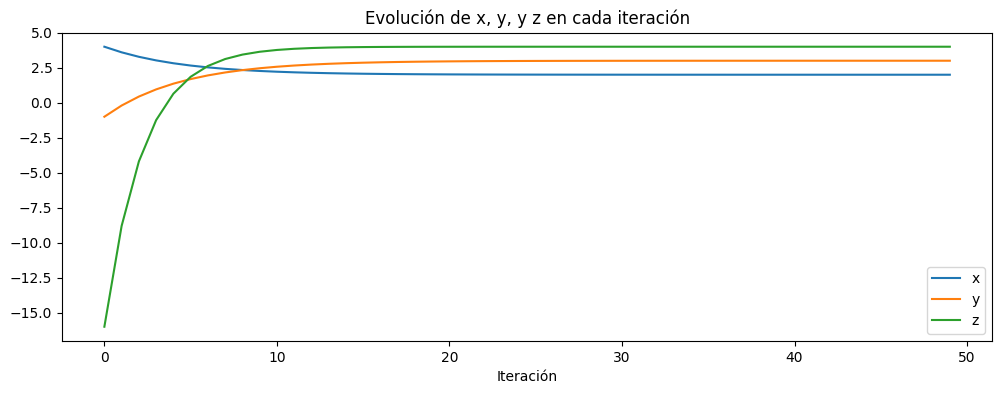

In [49]:
# Defino 2 tensores con seguimiento de gradiente, valor inicial arbitrario
x = torch.tensor([4.0], requires_grad=True)
y = torch.tensor([-1.0], requires_grad=True)

# Hiperparámetros SGD
lr = 0.1
max_iter = 50

# Resultados intermedios
x_values = []
y_values = []
z_values = []

# SGD Loop
for epoch in range(max_iter):
    z = (
        (x - 2) ** 2 + (y - 3) ** 2 - 4
    )  # Buscar un máximo de z es lo mismo que buscar el mínimo de -z

    # Guardar los valores en cada iteración
    x_values.append(x.item())
    y_values.append(y.item())
    z_values.append(-1 * z.item())  # El valor de z sí es el original

    z.backward()  # Calcular gradientes

    # Actualizar parámetros
    with torch.no_grad():
        x -= lr * x.grad
        y -= lr * y.grad
        # Reiniciar gradientes
        x.grad.zero_()
        y.grad.zero_()

# Impresión de resultados
plt.figure(figsize=(12, 4))

plt.plot(x_values, label="x")
plt.plot(y_values, label="y")
plt.plot(z_values, label="z")

plt.title("Evolución de x, y, y z en cada iteración")
plt.xlabel("Iteración")
plt.legend()

plt.show()

Como se puede observar, el método de gradiente actualiza los valores de las variables hasta que alcanzan el punto de gradiente 0 en el punto (2,3)
tal y como habíamos calculado de forma analítica

## Ejercicio 2
#### Apartado 1

In [50]:
data = pd.read_csv("resources/Positioning_data.csv")
data = data.fillna(-200)  # Reemplazo de valores vacíos
data[["x", "y"]] = data["Pos"].apply(process_coordinates)
print(data.head())

   Pos  Baliza1  Baliza2  Baliza3  Baliza4  Baliza5  Baliza6  Baliza7  \
0  O02   -200.0   -200.0   -200.0   -200.0   -200.0    -78.0   -200.0   
1  P01   -200.0   -200.0   -200.0   -200.0   -200.0    -78.0   -200.0   
2  P01   -200.0   -200.0   -200.0   -200.0   -200.0    -77.0   -200.0   
3  P01   -200.0   -200.0   -200.0   -200.0   -200.0    -77.0   -200.0   
4  P01   -200.0   -200.0   -200.0   -200.0   -200.0    -77.0   -200.0   

   Baliza8  Baliza9  Baliza10  Baliza11  Baliza12  Baliza13   x  y  
0   -200.0   -200.0    -200.0    -200.0    -200.0    -200.0  14  2  
1   -200.0   -200.0    -200.0    -200.0    -200.0    -200.0  15  1  
2   -200.0   -200.0    -200.0    -200.0    -200.0    -200.0  15  1  
3   -200.0   -200.0    -200.0    -200.0    -200.0    -200.0  15  1  
4   -200.0   -200.0    -200.0    -200.0    -200.0    -200.0  15  1  
